In [1]:
# import dependencies
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

In [31]:
# File to Load (These were changed)
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")
# Read the Mouse and Drug Data and the Clinical Trial Data
city_data_df.head()


city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [32]:
# Combine the data into a single dataset
#combine them on the 'city' connection, meaning one-to-many
total_data_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])
# Display the data table for preview
total_data_df.head()


city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

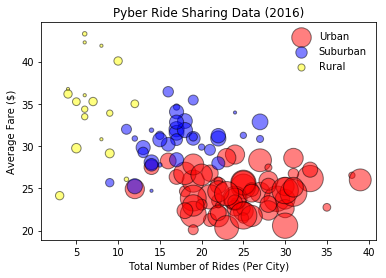

In [14]:
# #split up into 'type' groups
# type_groups = total_data_df.groupby("type").sum()
# colors = ["red", "blue", "yellow"]
# subtype_groups = type_groups.groupby("city")
# xdata = type_groups["fare"].count()
# # xdata
# average_fares = total_data_df.groupby("city").count()["fare"]

# ydata = subtype_groups["fare"].mean()

# zdata = subtype_groups["driver_count"].mean()*10

#urban category
urbantest = total_data_df[total_data_df["type"] == "Urban"]
urban_xdata = urbantest.groupby("city").count()["fare"]
urban_ydata = urbantest.groupby("city").mean()["fare"]
urban_zdata = urbantest.groupby("city").mean()["driver_count"]*10

#suburban category
suburbantest = total_data_df[total_data_df["type"] == "Suburban"]
suburban_xdata = suburbantest.groupby("city").count()["fare"]
suburban_ydata = suburbantest.groupby("city").mean()["fare"]
suburban_zdata = suburbantest.groupby("city").mean()["driver_count"]*10

#rural category
ruraltest = total_data_df[total_data_df["type"] == "Rural"]
rural_xdata = ruraltest.groupby("city").count()["fare"]
rural_ydata = ruraltest.groupby("city").mean()["fare"]
rural_zdata = ruraltest.groupby("city").mean()["driver_count"]*10

#print(urbantest, suburbantest, ruraltest)


# Build the scatter plots for each city types
plt.scatter(urban_xdata, urban_ydata, urban_zdata, facecolors="red", edgecolors="black", alpha=0.5, label="Urban")
plt.scatter(suburban_xdata, suburban_ydata, suburban_zdata, facecolors="blue", edgecolors="black", alpha=0.5, label="Suburban")
plt.scatter(rural_xdata, rural_ydata, rural_zdata, facecolors="yellow", edgecolors="black", alpha=0.5, label="Rural")

plt.legend(loc='upper right', frameon=False)

# Create a title, x label, and y label for chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.show()

In [15]:
#get data for total fares % by city type
faredata = type_groups["fare"].sum()
faredata

63538.63999999999

([<matplotlib.patches.Wedge at 0x1e35f9e9160>,
 [Text(-1.0620893660215651, 0.558539325906341, 'Rural'),
  Text(-0.8505386879122898, -0.6975556897943278, 'Suburban'),
  Text(0.9792721358604437, 0.5010250332341937, 'Urban')],
 [Text(-0.6195521301792464, 0.32581460677869895, '6.8%'),
  Text(-0.4639301934067035, -0.38048492170599696, '30.5%'),
  Text(0.5341484377420601, 0.2732863817641056, '62.7%')])

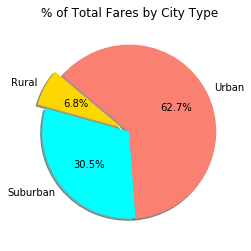

In [36]:
#   % of Total Rides by City Type

# adding new portion
subtype_groups = type_groups.groupby("type")
ydata = subtype_groups["fare"].mean()

type = ["Rural", "Suburban", "Urban"]

sizes = [4327.93, 19356.33, 39854.38]

colors = ["gold", "aqua", "salmon"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.pie(ydata, explode=explode, labels=ydata.keys(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


type
Rural       1
Suburban    1
Urban       1
Name: ride_id, dtype: int64


([<matplotlib.patches.Wedge at 0x1e35f94e908>,
 [Text(-1.127631132134195, -0.4104242071829508, 'Rural'),
  Text(0.8426489536312033, -0.7070662917607078, 'Suburban'),
  Text(0.1910128263923015, 1.0832885581199612, 'Urban')],
 [Text(-0.6577848270782805, -0.23941412085672129, '33.3%'),
  Text(0.4596267019806563, -0.38567252277856784, '33.3%'),
  Text(0.1041888143958008, 0.5908846680654333, '33.3%')])

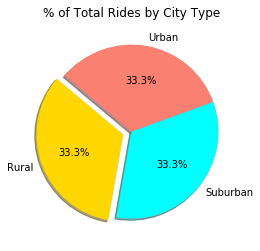

In [37]:
#get data for total rides by city type
# subtype_groups = type_groups.groupby("type")
rides_data = subtype_groups["ride_id"].count()
print(rides_data)
# % of Total Rides by City Type
type = ["Rural", "Suburban", "Urban"]

sizes = [125, 625, 1625]

colors = ["gold", "aqua", "salmon"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.pie(rides_data, explode=explode, labels=rides_data.keys(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1e35f7702b0>,
 [Text(-0.02946104300794889, 1.1996382983820097, 'Rural'),
  Text(-0.4694828155709783, 0.9947793151667093, 'Suburban'),
  Text(0.44491856107515704, -1.0060057027725102, 'Urban')],
 [Text(-0.017185608421303518, 0.6997890073895056, '0.8%'),
  Text(-0.25608153576598813, 0.5426068991818414, '12.5%'),
  Text(0.24268285149554017, -0.54873038333046, '86.7%')])

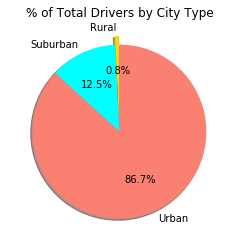

In [39]:
# driverdata = type_groups["driver_count"].sum()
# driverdata

subtype_groups = type_groups.groupby("type")
driverdata = subtype_groups["driver_count"].sum()
# print(driverdata)

#   % of Total Rides by City Type

type = ["Rural", "Suburban", "Urban"]

sizes = [537, 8570, 59602]

colors = ["gold", "aqua", "salmon"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.title('% of Total Drivers by City Type')
plt.pie(driverdata, explode=explode, labels=driverdata.keys(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [68]:
#subtype_groups = total_data_df.groupby("city").mean()["fare"]
#print(subtype_groups)

###     These are my three observations regarding the data trends     ###
# Unfortunately I can't actually see the difference in my pie graphs.  I've been 
# trying to figure out why, but it's 2:00AM and I'm exhausted.  But I can see that 
# Urban environments have the most overwhelming majority of the “Percentage of 
# Total Rides” as compared to Rural environments.  Which makes sense, because 
# people are less likely to have their own cars so they will rely on our Pyber 
# service – this is where we will get our highest engagement of customers.

# However, the first conclusion is balanced out by the fact that Rural environments 
# will not get the same ratio of returns on investment in terms of “% of Total Fares 
# by City Type”.  Which makes sense when you consider that Rural environments – which 
# even though brings in the least number of fares – those fares are more expensive.

# Our Pyber platform is also most heavily represented in Urban environments.  Meaning 
# that there is a far higher ratio of drivers to drivees in urban environments.  Which 
# makes sense considering that you have access to a much large flexible hours driving pool.


city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [ ]:
### Adding as a test